<a href="https://colab.research.google.com/github/nathyuribe/El-Cerrej-n---GEE-API---Remote-Sensing/blob/main/CerrejonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initialize Google Earth Engine API and Folium**

In [ ]:
!pip install geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.6 MB/s eta 0:00:00


!pip install earthengine-api # GEE API
!pip install folium # Folium, which is a library that will help display our imagery

In [ ]:
#Import Google Earth Engine (GEE), authenticate, and initialize
import ee
ee.Authenticate()
ee.Initialize(project="ee-nathy")

Now that we have Google Earth Engine initalized, let's download Sentinel-2 Optical Imagery for the city of Munich

# **GEE: Load LandSat Data**

Let's first start by loading the city boundary that is specific to El Cerrejón

In [ ]:
"""City information can be found here: https://code.earthengine.google.com/?scriptPath=users%2Fsat-io%2Fawesome-gee-catalog-examples%3Apopulation-socioeconomics%2FGEOBOUNDARIES
Select "Run"
on the left hand side there will be dropdown boxes, use these to select your country/region/city
Use the inspector tool to click within the polygon and on the right hand side, continue to click the drop downs until you get to the objects properties,
from there, look in teh list to find "shapeID"
"""


# Load city boundaries and select Munich
ShapeID = ['COL-ADM2-3_0_0-B417','COL-ADM2-3_0_0-B418','COL-ADM2-3_0_0-B423'] # Cerrejón's  specific boundary
borders = ee.FeatureCollection('projects/sat-io/open-datasets/geoboundaries/CGAZ_ADM2') # FeatureCollection of HPSCGS-ADM3 boundaries
boundary = borders.filter(ee.Filter.inList('shapeID', ShapeID)).geometry() # Filter the FeatureCollection for the Munich boundary

In [ ]:
# Example code
#LANDSAT/LT05/C02/T1_L2
#LANDSAT/LE07/C02/T1_L2

def applyScaleFactors_1983_2013(image):
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(149.0)
    return image.addBands(opticalBands, None, True).addBands(
        thermalBand, None, True
    ).clip(boundary)

visualization_1983_2013 = {
  'bands': ['SR_B3', 'SR_B2', 'SR_B1'],
  'min': 0.0,
  'max': 0.3,
};

#LANDSAT/LC08/C02/T1_L2
#LANDSAT/LC09/C02/T1_L2

def apply_scale_factors_2014_2024(image):
  optical_bands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
  thermal_bands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
  return image.addBands(optical_bands, None, True).addBands(
      thermal_bands, None, True
  ).clip(boundary)

visualization_2014_2024 = {
    'bands': ['SR_B4', 'SR_B3', 'SR_B2'],
    'min': 0.0,
    'max': 0.3,
}








In [ ]:
#Datasets

#LANDSAT/LT05/C02/T1_L2

DS1985_clouds = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2").filterDate("1985-01-01", "1985-12-31").filter(ee.Filter.bounds(boundary))
DS1985_nocolor = DS1985_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS1985 = DS1985_nocolor.map(applyScaleFactors_1983_2013)

DS1986_clouds = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2").filterDate("1986-01-01", "1986-12-31").filter(ee.Filter.bounds(boundary))
DS1986_nocolor = DS1986_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS1986 = DS1986_nocolor.map(applyScaleFactors_1983_2013)

DS1987_clouds = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2").filterDate("1987-01-01", "1987-12-31").filter(ee.Filter.bounds(boundary))
DS1987_nocolor = DS1987_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS1987 = DS1987_nocolor.map(applyScaleFactors_1983_2013)

DS1988_clouds = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2").filterDate("1988-01-01", "1988-12-31").filter(ee.Filter.bounds(boundary))
DS1988_nocolor = DS1988_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS1988 = DS1988_nocolor.map(applyScaleFactors_1983_2013)

DS1989_clouds = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2").filterDate("1989-01-01", "1989-12-31").filter(ee.Filter.bounds(boundary))
DS1989_nocolor = DS1989_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS1989 = DS1989_nocolor.map(applyScaleFactors_1983_2013)

DS1990_clouds = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2").filterDate("1990-01-01", "1990-12-31").filter(ee.Filter.bounds(boundary))
DS1990_nocolor = DS1990_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS1990 = DS1990_nocolor.map(applyScaleFactors_1983_2013)

DS1991_clouds = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2").filterDate("1991-01-01", "1991-12-31").filter(ee.Filter.bounds(boundary))
DS1991_nocolor = DS1991_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS1991 = DS1991_nocolor.map(applyScaleFactors_1983_2013)

DS1992_clouds = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2").filterDate("1992-01-01", "1992-12-31").filter(ee.Filter.bounds(boundary))
DS1992_nocolor = DS1992_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS1992 = DS1992_nocolor.map(applyScaleFactors_1983_2013)

DS1993_clouds = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2").filterDate("1993-01-01", "1993-12-31").filter(ee.Filter.bounds(boundary))
DS1993_nocolor = DS1993_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS1993 = DS1993_nocolor.map(applyScaleFactors_1983_2013)

DS1994_clouds = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2").filterDate("1994-01-01", "1994-12-31").filter(ee.Filter.bounds(boundary))
DS1994_nocolor = DS1994_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS1994 = DS1994_nocolor.map(applyScaleFactors_1983_2013)

DS1995_clouds = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2").filterDate("1995-01-01", "1995-12-31").filter(ee.Filter.bounds(boundary))
DS1995_nocolor = DS1995_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS1995 = DS1995_nocolor.map(applyScaleFactors_1983_2013)

DS1996_clouds = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2").filterDate("1996-01-01", "1996-12-31").filter(ee.Filter.bounds(boundary))
DS1996_nocolor = DS1996_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS1996 = DS1996_nocolor.map(applyScaleFactors_1983_2013)

DS1997_clouds = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2").filterDate("1997-01-01", "1997-12-31").filter(ee.Filter.bounds(boundary))
DS1997_nocolor = DS1997_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS1997 = DS1997_nocolor.map(applyScaleFactors_1983_2013)

DS1998_clouds = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2").filterDate("1998-01-01", "1998-12-31").filter(ee.Filter.bounds(boundary))
DS1998_nocolor = DS1998_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS1998 = DS1998_nocolor.map(applyScaleFactors_1983_2013)

#LANDSAT/LE07/C02/T1_L2
DS1999_clouds = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2").filterDate("1999-01-01", "1999-12-31").filter(ee.Filter.bounds(boundary))
DS1999_nocolor = DS1999_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS1999 = DS1999_nocolor.map(applyScaleFactors_1983_2013)

DS2000_clouds = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2").filterDate("2000-01-01", "2000-12-31").filter(ee.Filter.bounds(boundary))
DS2000_nocolor = DS2000_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2000 = DS2000_nocolor.map(applyScaleFactors_1983_2013)

DS2001_clouds = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2").filterDate("2001-01-01", "2001-12-31").filter(ee.Filter.bounds(boundary))
DS2001_nocolor = DS2001_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2001 = DS2001_nocolor.map(applyScaleFactors_1983_2013)

DS2002_clouds = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2").filterDate("2002-01-01", "2002-12-31").filter(ee.Filter.bounds(boundary))
DS2002_nocolor = DS2002_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2002 = DS2002_nocolor.map(applyScaleFactors_1983_2013)

DS2003_clouds = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2").filterDate("2003-01-01", "2003-12-31").filter(ee.Filter.bounds(boundary))
DS2003_nocolor = DS2003_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2003 = DS2003_nocolor.map(applyScaleFactors_1983_2013)

DS2004_clouds = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2").filterDate("2004-01-01", "2004-12-31").filter(ee.Filter.bounds(boundary))
DS2004_nocolor = DS2004_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2004 = DS2004_nocolor.map(applyScaleFactors_1983_2013)

DS2005_clouds = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2").filterDate("2005-01-01", "2005-12-31").filter(ee.Filter.bounds(boundary))
DS2005_nocolor = DS2005_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2005 = DS2005_nocolor.map(applyScaleFactors_1983_2013)

DS2006_clouds = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2").filterDate("2006-01-01", "2006-12-31").filter(ee.Filter.bounds(boundary))
DS2006_nocolor = DS2006_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2006 = DS2006_nocolor.map(applyScaleFactors_1983_2013)

DS2007_clouds = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2").filterDate("2007-01-01", "2007-12-31").filter(ee.Filter.bounds(boundary))
DS2007_nocolor = DS2007_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2007 = DS2007_nocolor.map(applyScaleFactors_1983_2013)

DS2008_clouds = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2").filterDate("2008-01-01", "2008-12-31").filter(ee.Filter.bounds(boundary))
DS2008_nocolor = DS2008_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2008 = DS2008_nocolor.map(applyScaleFactors_1983_2013)

DS2009_clouds = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2").filterDate("2009-01-01", "2009-12-31").filter(ee.Filter.bounds(boundary))
DS2009_nocolor = DS2009_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2009 = DS2009_nocolor.map(applyScaleFactors_1983_2013)

DS2010_clouds = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2").filterDate("2010-01-01", "2010-12-31").filter(ee.Filter.bounds(boundary))
DS2010_nocolor = DS2010_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2010 = DS2010_nocolor.map(applyScaleFactors_1983_2013)

DS2011_clouds = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2").filterDate("2011-01-01", "2011-12-31").filter(ee.Filter.bounds(boundary))
DS2011_nocolor = DS2011_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2011 = DS2011_nocolor.map(applyScaleFactors_1983_2013)

DS2012_clouds = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2").filterDate("2012-01-01", "2012-12-31").filter(ee.Filter.bounds(boundary))
DS2012_nocolor = DS2012_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2012 = DS2012_nocolor.map(applyScaleFactors_1983_2013)

DS2013_clouds = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2").filterDate("2013-01-01", "2013-12-31").filter(ee.Filter.bounds(boundary))
DS2013_nocolor = DS2013_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2013 = DS2013_nocolor.map(applyScaleFactors_1983_2013)


#LANDSAT/LC08/C02/T1_L2

DS2014_clouds = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate("2014-01-01", "2014-12-31").filter(ee.Filter.bounds(boundary))
DS2014_nocolor=DS2014_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2014=DS2014_nocolor.map(apply_scale_factors_2014_2024)

DS2015_clouds = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate("2015-01-01", "2015-12-31").filter(ee.Filter.bounds(boundary))
DS2015_nocolor=DS2015_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2015=DS2015_nocolor.map(apply_scale_factors_2014_2024)

DS2016_clouds = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate("2016-01-01", "2016-12-31").filter(ee.Filter.bounds(boundary))
DS2016_nocolor=DS2016_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2016=DS2016_nocolor.map(apply_scale_factors_2014_2024)

DS2017_clouds = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate("2017-01-01", "2017-12-31").filter(ee.Filter.bounds(boundary))
DS2017_nocolor=DS2017_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2017=DS2017_nocolor.map(apply_scale_factors_2014_2024)

DS2018_clouds = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate("2018-01-01", "2018-12-31").filter(ee.Filter.bounds(boundary))
DS2018_nocolor=DS2018_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2018=DS2018_nocolor.map(apply_scale_factors_2014_2024)

DS2019_clouds = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate("2019-01-01", "2019-12-31").filter(ee.Filter.bounds(boundary))
DS2019_nocolor=DS2019_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2019=DS2019_nocolor.map(apply_scale_factors_2014_2024)


DS2020_clouds = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate("2020-01-01", "2020-12-31").filter(ee.Filter.bounds(boundary))
DS2020_nocolor=DS2020_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2020=DS2020_nocolor.map(apply_scale_factors_2014_2024)


DS2021_clouds = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate("2021-01-01", "2021-12-31").filter(ee.Filter.bounds(boundary))
DS2021_nocolor=DS2021_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2021=DS2021_nocolor.map(apply_scale_factors_2014_2024)

#LANDSAT/LC09/C02/T1_L2

DS2022_clouds = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2").filterDate("2022-01-01", "2022-12-31").filter(ee.Filter.bounds(boundary))
DS2022_nocolor=DS2022_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2022=DS2022_nocolor.map(apply_scale_factors_2014_2024)

DS2023_clouds = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2").filterDate("2023-01-01", "2023-12-31").filter(ee.Filter.bounds(boundary))
DS2023_nocolor=DS2023_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2023=DS2023_nocolor.map(apply_scale_factors_2014_2024)

DS2024_clouds = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2").filterDate("2024-01-01", "2024-12-31").filter(ee.Filter.bounds(boundary))
DS2024_nocolor=DS2024_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
DS2024=DS2024_nocolor.map(apply_scale_factors_2014_2024)

Cerrejon = ee.Geometry.Point([-72.6671, 11.0427])
Tabaco_Hatonuevo = ee.Geometry.Point([-72.5719, 11.1058])
Roche = ee.Geometry.Point([-72.646469, 11.074976])
Tamaquito = ee.Geometry.Point([-72.831836, 10.944520])
Chancleta = ee.Geometry.Point([-72.664684, 11.049147])
Patilla = ee.Geometry.Point([-72.678861, 11.047178])

visParamsyellow = {
    'color': 'yellow',  # Set the color of the point
    'pointSize': 30     # Set the size of the point
}
visParamsblue = {
    'color': 'blue',  # Set the color of the point
    'pointSize': 30     # Set the size of the point
}
visParamsred = {
    'color': 'red',  # Set the color of the point
    'pointSize': 30     # Set the size of the point
}

visParamspurple = {
    'color': 'purple',  # Set the color of the point
    'pointSize': 30     # Set the size of the point
}

visParamsgreen = {
    'color': 'green',  # Set the color of the point
    'pointSize': 30     # Set the size of the point
}






#Visaulize on the Map

In [ ]:
import geemap
displaymap0 = geemap.Map(location = [-72.6671, 11.0427], zoom_start=3000)

displaymap0.add_layer(DS1985, visualization_1983_2013, 'True Color (1985)')
displaymap0.add_layer(DS1986, visualization_1983_2013, 'True Color (1986)')
displaymap0.add_layer(DS1987, visualization_1983_2013, 'True Color (1987)')
displaymap0.add_layer(DS1988, visualization_1983_2013, 'True Color (1988)')
displaymap0.add_layer(DS1989, visualization_1983_2013, 'True Color (1989)')
displaymap0.add_layer(DS1990, visualization_1983_2013, 'True Color (1990)')
displaymap0.add_layer(DS1991, visualization_1983_2013, 'True Color (1991)')
displaymap0.add_layer(DS1992, visualization_1983_2013, 'True Color (1992)')
displaymap0.add_layer(DS1993, visualization_1983_2013, 'True Color (1993)')
displaymap0.add_layer(DS1994, visualization_1983_2013, 'True Color (1994)')
displaymap0.add_layer(DS1995, visualization_1983_2013, 'True Color (1995)')
displaymap0.add_layer(DS1996, visualization_1983_2013, 'True Color (1996)')
displaymap0.add_layer(DS1997, visualization_1983_2013, 'True Color (1997)')
displaymap0.add_layer(DS1998, visualization_1983_2013, 'True Color (1998)')

displaymap0.addLayer(Tabaco_Hatonuevo, visParamsred, "tabacogoogle")
displaymap0.centerObject(Tabaco_Hatonuevo, zoom=10)

displaymap0.addLayer(Roche, visParamsblue, "Roche")
displaymap0.centerObject(Roche, zoom=10)

displaymap0.addLayer(Tamaquito, visParamsyellow, "Tamaquito")
displaymap0.centerObject(Tamaquito, zoom=10)

displaymap0.addLayer(Chancleta, visParamspurple, "Chancleta")
displaymap0.centerObject(Chancleta, zoom=10)

displaymap0.addLayer(Patilla, visParamsgreen, "Patilla")
displaymap0.centerObject(Patilla, zoom=10)


displaymap0.addLayerControl()
displaymap0


Map(center=[11.047178000000002, -72.678861], controls=(WidgetControl(options=['position', 'transparent_bg'], w…

In [ ]:

displaymap1 = geemap.Map(location = [-72.6671, 11.0427], zoom_start=3000)
displaymap1.add_layer(DS1999, visualization_1983_2013, 'True Color (1999)')
displaymap1.add_layer(DS2000, visualization_1983_2013, 'True Color (2000)')
displaymap1.add_layer(DS2001, visualization_1983_2013, 'True Color (2001)')
displaymap1.add_layer(DS2002, visualization_1983_2013, 'True Color (2002)')
displaymap1.add_layer(DS2003, visualization_1983_2013, 'True Color (2003)')
displaymap1.add_layer(DS2004, visualization_1983_2013, 'True Color (2004)')
displaymap1.add_layer(DS2005, visualization_1983_2013, 'True Color (2005)')
displaymap1.add_layer(DS2006, visualization_1983_2013, 'True Color (2006)')
displaymap1.add_layer(DS2007, visualization_1983_2013, 'True Color (2007)')
displaymap1.add_layer(DS2008, visualization_1983_2013, 'True Color (2008)')
displaymap1.add_layer(DS2009, visualization_1983_2013, 'True Color (2009)')
displaymap1.add_layer(DS2010, visualization_1983_2013, 'True Color (2010)')
displaymap1.add_layer(DS2011, visualization_1983_2013, 'True Color (2011)')
displaymap1.add_layer(DS2012, visualization_1983_2013, 'True Color (2012)')
displaymap1.add_layer(DS2013, visualization_1983_2013, 'True Color (2013)')


displaymap1.addLayer(Tabaco_Hatonuevo, visParamsred, "tabacogoogle")
displaymap1.centerObject(Tabaco_Hatonuevo, zoom=10)

displaymap1.addLayer(Roche, visParamsblue, "Roche")
displaymap1.centerObject(Roche, zoom=10)

displaymap1.addLayer(Tamaquito, visParamsyellow, "Tamaquito")
displaymap1.centerObject(Tamaquito, zoom=10)

displaymap1.addLayer(Chancleta, visParamspurple, "Chancleta")
displaymap1.centerObject(Chancleta, zoom=10)

displaymap1.addLayer(Patilla, visParamsgreen, "Patilla")
displaymap1.centerObject(Patilla, zoom=10)

displaymap1.addLayerControl()
displaymap1

Map(center=[11.047178000000002, -72.678861], controls=(WidgetControl(options=['position', 'transparent_bg'], w…

In [ ]:
displaymap2 = geemap.Map(location = [-72.6671, 11.0427], zoom_start=3000)
displaymap2.add_layer(DS2014, visualization_2014_2024, 'True Color (2014)')
displaymap2.add_layer(DS2015, visualization_2014_2024, 'True Color (2015)')
displaymap2.add_layer(DS2016, visualization_2014_2024, 'True Color (2016)')
displaymap2.add_layer(DS2017, visualization_2014_2024, 'True Color (2017)')
displaymap2.add_layer(DS2018, visualization_2014_2024, 'True Color (2018)')
displaymap2.add_layer(DS2019, visualization_2014_2024, 'True Color (2019)')
displaymap2.add_layer(DS2020, visualization_2014_2024, 'True Color (2020)')
displaymap2.add_layer(DS2021, visualization_2014_2024, 'True Color (2021)')
displaymap2.add_layer(DS2022, visualization_2014_2024, 'True Color (2022)')
displaymap2.add_layer(DS2023, visualization_2014_2024, 'True Color (2023)')
displaymap2.add_layer(DS2024, visualization_2014_2024, 'True Color (2024)')


displaymap2.addLayer(Tabaco_Hatonuevo, visParamsred, "tabacogoogle")
displaymap2.centerObject(Tabaco_Hatonuevo, zoom=10)

displaymap2.addLayer(Roche, visParamsblue, "Roche")
displaymap2.centerObject(Roche, zoom=10)

displaymap2.addLayer(Tamaquito, visParamsyellow, "Tamaquito")
displaymap2.centerObject(Tamaquito, zoom=10)

displaymap2.addLayer(Chancleta, visParamspurple, "Chancleta")
displaymap2.centerObject(Chancleta, zoom=10)

displaymap2.addLayer(Patilla, visParamsgreen, "Patilla")
displaymap2.centerObject(Patilla, zoom=10)

displaymap2.addLayerControl()
displaymap2


Map(center=[11.047178000000002, -72.678861], controls=(WidgetControl(options=['position', 'transparent_bg'], w…

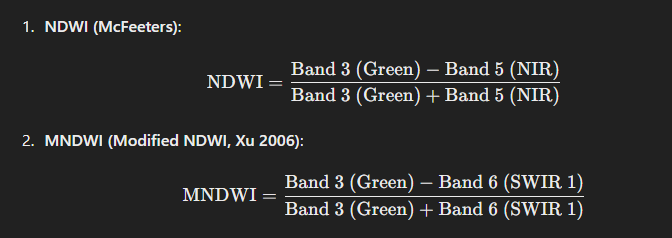

In [ ]:
# Define the function to calculate NDWI 1985-1998
def calculate_ndwi_1985_2013(image):
    ndwi = image.normalizedDifference(['SR_B2', 'SR_B4']).rename('NDWI')
    return image.addBands(ndwi)

# Define the function to calculate MNDWI for 1985-1998
def calculate_mndwi_1985_2013(image):
    mndwi = image.normalizedDifference(['SR_B2', 'SR_B5']).rename('MNDWI')
    return image.addBands(mndwi)


# Define the function to calculate NDWI 2014-2024
def calculate_ndwi_2014_2024(image):
    ndwi = image.normalizedDifference(['SR_B3', 'SR_B5']).rename('NDWI')
    return image.addBands(ndwi)

# Define the function to calculate MNDWI
def calculate_mndwi_2014_2024(image):
    mndwi = image.normalizedDifference(['SR_B3', 'SR_B6']).rename('MNDWI')
    return image.addBands(mndwi)

# Visualization parameters for MNDWI


mndwi_visualization = {
    'min': -1.0,
    'max': 1.0,
    'palette': ['00FFFF', '0000FF']
}




In [ ]:
#DS2024_clouds = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2").filterDate("2024-01-01", "2024-12-31").filter(ee.Filter.bounds(boundary))
#DS2024_nocolor=DS2024_clouds.filter(ee.Filter.lt('CLOUD_COVER_LAND', 20))
#DS2024=DS2024_nocolor.map(apply_scale_factors_2014_2024)

In [ ]:
# Create a map
Map = geemap.Map()

# Center the map around the boundary
Map.centerObject(boundary, 10)

# Calculate NDWI and MNDWI
DS1985_with_indices = DS1985.map(calculate_ndwi_1985_2013).map(calculate_mndwi_1985_2013)
Map.addLayer(DS1985_with_indices.select('MNDWI'), mndwi_visualization, 'MNDWI 1985')

DS2000_with_indices = DS2000.map(calculate_ndwi_1985_2013).map(calculate_mndwi_1985_2013)
Map.addLayer(DS2000_with_indices.select('MNDWI'), mndwi_visualization, 'MNDWI 1999')

# Calculate NDWI and MNDWI
DS2014_with_indices = DS2014.map(calculate_ndwi_2014_2024).map(calculate_mndwi_2014_2024)
Map.addLayer(DS2014_with_indices.select('MNDWI'), mndwi_visualization, 'MNDWI 2014')

DS2023_with_indices = DS2023.map(calculate_ndwi_2014_2024).map(calculate_mndwi_2014_2024)
Map.addLayer(DS2023_with_indices.select('MNDWI'), mndwi_visualization, 'MNDWI 2023')

#Add community points
Map.addLayer(Tabaco_Hatonuevo, visParamsred, "tabacogoogle")
Map.centerObject(Tabaco_Hatonuevo, zoom=10)

Map.addLayer(Roche, visParamsblue, "Roche")
Map.centerObject(Roche, zoom=10)

Map.addLayer(Tamaquito, visParamsyellow, "Tamaquito")
Map.centerObject(Tamaquito, zoom=10)

Map.addLayer(Chancleta, visParamspurple, "Chancleta")
Map.centerObject(Chancleta, zoom=10)

Map.addLayer(Patilla, visParamsgreen, "Patilla")
Map.centerObject(Patilla, zoom=10)

Map.addLayerControl()

# Display the map
Map

Map(center=[11.047178000000002, -72.678861], controls=(WidgetControl(options=['position', 'transparent_bg'], w…

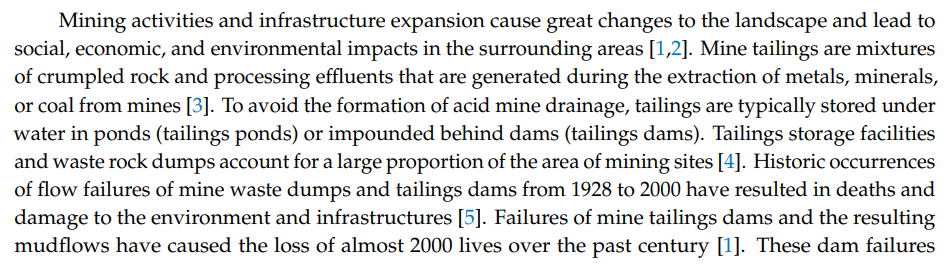

https://www.mdpi.com/2072-4292/12/16/2626

#On this Section We will start to anotate the data for training

In [ ]:
# Load and preprocess images for each year
years = list(range(1985, 1998))
images_1985_1998 = []
for year in years:
    collection = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2") \
                .filterDate(f'{year}-01-01', f'{year}-12-31') \
                .filterBounds(boundary) \
                .map(applyScaleFactors_1983_2013) \
                .map(calculate_mndwi_1985_2013)
    image = collection.median()
    images_1985_1998.append(image)

# Create a single image collection from the yearly images
image_collection_1985_1998 = ee.ImageCollection.fromImages(images_1985_1998)

# Load and preprocess images for each year
years = list(range(1999, 2013))
images_1999_2013 = []
for year in years:
    collection = ee.ImageCollection("LANDSAT/LE07/C02/T1_L2") \
                .filterDate(f'{year}-01-01', f'{year}-12-31') \
                .filterBounds(boundary) \
                .map(applyScaleFactors_1983_2013) \
                .map(calculate_mndwi_1985_2013)
    image = collection.median()
    images_1999_2013.append(image)

# Create a single image collection from the yearly images
image_collection_1999_2013 = ee.ImageCollection.fromImages(images_1999_2013)


# Load and preprocess images for each year
years = list(range(2014, 2021))
images_2014_2021 = []
for year in years:
    collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
                .filterDate(f'{year}-01-01', f'{year}-12-31') \
                .filterBounds(boundary) \
                .map(apply_scale_factors_2014_2024) \
                .map(calculate_mndwi_2014_2024)
    image = collection.median()
    images_2014_2021.append(image)

# Create a single image collection from the yearly images
image_collection_2014_2021 = ee.ImageCollection.fromImages(images_2014_2021)

years = list(range(2022, 2024))
images_2022_2024 = []
for year in years:
    collection = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2") \
                .filterDate(f'{year}-01-01', f'{year}-12-31') \
                .filterBounds(boundary) \
                .map(apply_scale_factors_2014_2024) \
                .map(calculate_mndwi_2014_2024)
    image = collection.median()
    images_2022_2024.append(image)

# Create a single image collection from the yearly images
image_collection_2022_2024 = ee.ImageCollection.fromImages(images_2022_2024)

In [ ]:
#ALL IMAGES FROM 1985 to 2013
merged_image_collection_2014_2024 = image_collection_1985_1998 \
    .merge(image_collection_1999_2013)

#ALL IMAGES FROM 2014 to 2024
merged_image_collection_2014_2024 =  image_collection_2014_2021 \
    .merge(image_collection_2022_2024)

# Print information about the merged image collection
print('Merged Image Collection:', merged_image_collection_2014_2024.getInfo())

Merged Image Collection: {'type': 'ImageCollection', 'bands': [], 'features': [{'type': 'Image', 'bands': [{'id': 'SR_B1', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.2, 'max': 1.6022125}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'SR_B2', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.2, 'max': 1.6022125}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'SR_B3', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.2, 'max': 1.6022125}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'SR_B4', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.2, 'max': 1.6022125}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'SR_B5', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.2, 'max': 1.6022125}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'SR_B6', 'data_type': {'type': 'PixelType', 'precision': 'double',

In [ ]:
# Data source-specific imports
#Mount Google Drive to find dataset

from google.colab import drive
drive.mount('drive/', force_remount=True)

Mounted at drive/


##GEE CODE: for annotating data
// Initialize the Earth Engine
var countries = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017");
var colombia = countries.filter(ee.Filter.eq('country_na', 'Colombia'));
Map.centerObject(colombia, 8);

// Define the El Cerrejón zone (adjust coordinates as necessary)
var el_cerrejon = ee.Geometry.Polygon([[
    [-72.6734, 11.0052],
    [-72.6734, 11.2978],
    [-72.3011, 11.2978],
    [-72.3011, 11.0052]
]]);
Map.centerObject(el_cerrejon, 10);

// Function to mask clouds using the QA60 band
function maskL9clouds(image) {
  var cloudShadowBitMask = ee.Number(2).pow(3).int();
  var cloudsBitMask = ee.Number(2).pow(5).int();
  var qa = image.select('QA_PIXEL');
  var mask = qa.bitwiseAnd(cloudShadowBitMask).eq(0)
    .and(qa.bitwiseAnd(cloudsBitMask).eq(0));
  return image.updateMask(mask);
}

// Load Landsat 9 ImageCollection and filter for the year 2023
var l9_collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_L2')
  .filterBounds(el_cerrejon)
  .filterDate('2023-01-01', '2023-12-31')
  .map(maskL9clouds)
  .median();

// Apply scale factors to the Landsat 9 image
function applyScaleFactors(image) {
  var opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2);
  var thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0);
  return image.addBands(opticalBands, null, true).addBands(thermalBands, null, true);
}

var l9_composite = applyScaleFactors(l9_collection);

// Visualization parameters
var visParams = {'bands': ['SR_B4', 'SR_B3', 'SR_B2'], 'min': 0.0, 'max': 0.3};

// Add the Landsat 9 image to the map
Map.addLayer(l9_composite, visParams, 'Landsat 9 2023');

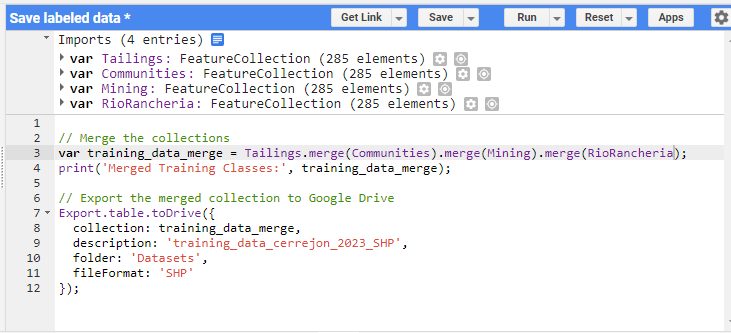

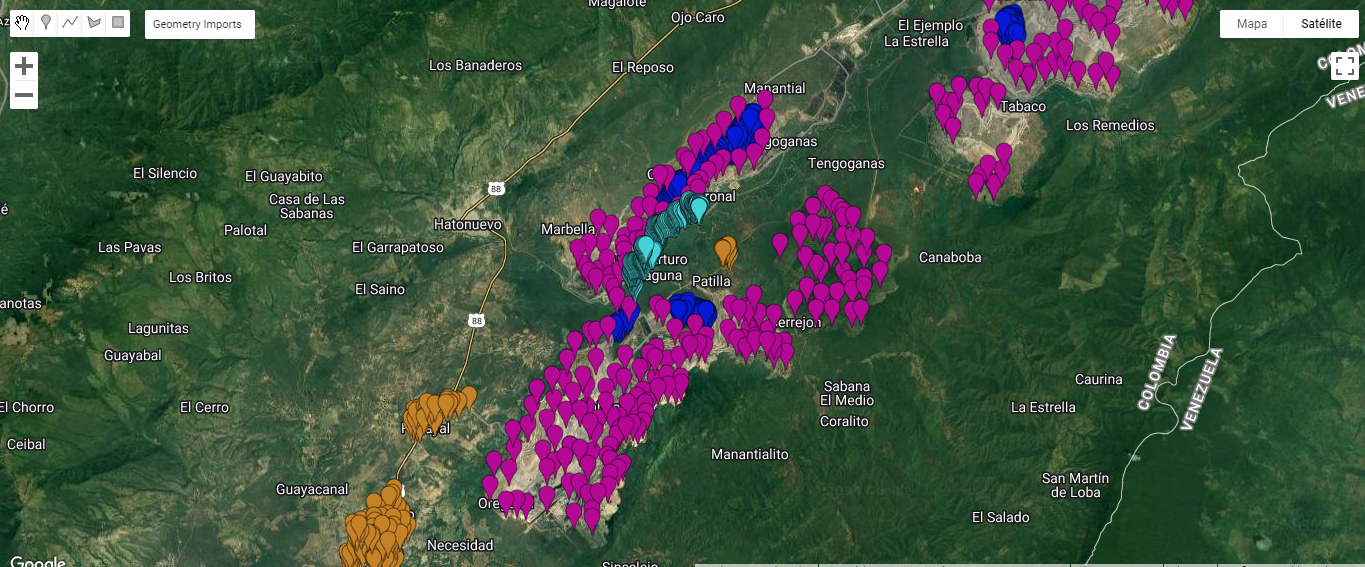

In [ ]:
# Import data training points
dataset = "/content/drive/MyDrive/Datasets/training_data_cerrejon_2023_4_SHP.shp"
print("dataset type", type(dataset))

dataset type <class 'str'>


Dataset type: <class 'geopandas.geodataframe.GeoDataFrame'>
Dataset head:
    label                    geometry
0      1  POINT (-72.66905 11.08817)
1      1  POINT (-72.66811 11.09007)
2      1  POINT (-72.66673 11.09352)
3      1  POINT (-72.66416 11.09293)
4      1  POINT (-72.66459 11.09740)
Columns in dataset: Index(['label', 'geometry'], dtype='object')
Number of points in the dataset: 1140
Geometry type: ['Point']


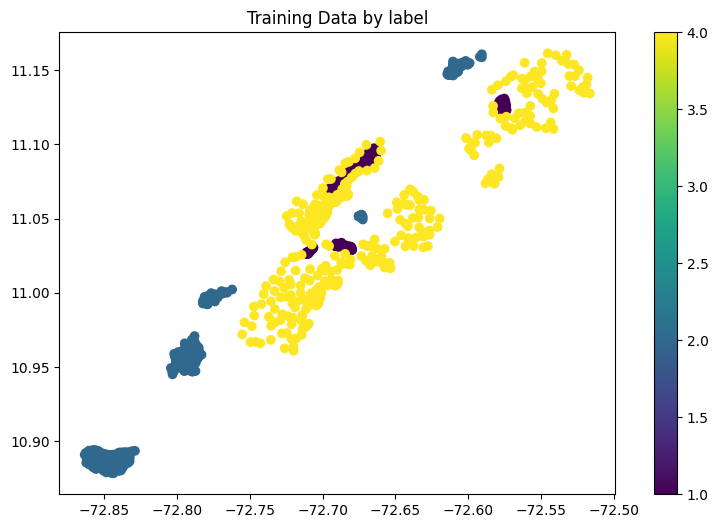

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
dataset = gpd.read_file("/content/drive/MyDrive/Datasets/training_data_cerrejon_2023_4_SHP.shp")

# Print dataset type
print("Dataset type:", type(dataset))

# Print the first few rows of the dataset
print("Dataset head:\n", dataset.head())

# Print the column names
print("Columns in dataset:", dataset.columns)

# Print the number of points in the dataset
print("Number of points in the dataset:", len(dataset))

# Print the geometry type of the dataset
print("Geometry type:", dataset.geom_type.unique())

# Check if 'class' column exists
if 'label' in dataset.columns:
    # Plot the dataset with different colors for each class label
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    dataset.plot(column='label', ax=ax, legend=True, cmap='viridis')
    plt.title('Training Data by label')
    plt.show()
else:
    print("The 'label' column does not exist in the dataset.")

# Alternatively, if there is no 'class' column, you can categorize by another column
# Uncomment and modify the following lines as needed:
# if 'another_column' in dataset.columns:
#     fig, ax = plt.subplots(1, 1, figsize=(10, 6))
#     dataset.plot(column='another_column', ax=ax, legend=True, cmap='viridis')
#     plt.title('Training Data by Another Column')
#     plt.show()
# else:
#     print("The specified column does not exist in the dataset.")


In [ ]:
!pip install earthengine-api geemap pycrs

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.9 MB/s eta 0:00:00
  Created wheel for pycrs: filename=PyCRS-1.0.2-py3-none-any.whl size=32687 sha256=60a925e4bfb97fadc645e1fc1a5e65e568ac1e15d895c9bc18c971b4260cd965
  Stored in directory: /root/.cache/pip/wheels/47/1d/70/7a5bdf33347e7c75e95b06b1fa38f076a59a9506653cc24aff
Successfully built pycrs


In [ ]:
drive_shapefile_path = '/content/drive/MyDrive/Datasets/training_data_cerrejon_2023_4_SHP.shp'  # Update this path to your actual file location

# Use geemap to upload the shapefile from Google Drive to Google Earth Engine
# Note: Make sure the shapefile is a .zip file containing .shp, .shx, .dbf, and .prj files
Dataset = geemap.shp_to_ee(drive_shapefile_path)

# Print dataset type and size
print("Dataset type:", type(dataset))
print("Dataset size:", dataset.size().getInfo())

# Visualize the FeatureCollection using geemap
Map = geemap.Map()
Map.addLayer(dataset, {}, 'FeatureCollection')
Map.centerObject(dataset, zoom=10)
Map

Dataset type: <class 'ee.featurecollection.FeatureCollection'>
Dataset size: 1140


Map(center=[11.040609674458873, -72.6959925604701], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
# Move landcovers to [0-2]
def remapProperty(feature):
  shifted_value=ee.Number(feature.get("class")).subtract(1)
  return feature.set("class",shifted_value)

Dataset = Dataset.map(remapProperty)

In [ ]:
# Split TrainingPoints into (1) TrainingPoints @ 80% and (2) ValidationPoints @ 20%
Dataset_RC = Dataset.randomColumn()
TrainingPoints =  Dataset_RC.filter('random <= 0.8')
ValidationPoints= Dataset_RC.filter('random > 0.8')

In [ ]:
# View total training and validation points
print("Amount of Training Points:",TrainingPoints.size().getInfo())
print("Amount of Validation Points:", ValidationPoints.size().getInfo())

Amount of Training Points: 913
Amount of Validation Points: 227


In [ ]:
bands_2014_2024 = [ 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'SR_QA_AEROSOL', 'ST_B10', 'ST_ATRAN', 'ST_CDIST', 'ST_DRAD', 'ST_EMIS', 'ST_EMSD', 'ST_QA', 'ST_TRAD', 'ST_URAD', 'QA_PIXEL', 'QA_RADSAT']



In [ ]:
Im2023=DS2023.median().clip(boundary)

# Table Property for landcover
label = 'label'

# Overlay the points on the imagery to get the training points with band data
training = Im2023.select(bands_2014_2024).sampleRegions(
    **{'collection': TrainingPoints, 'properties': [label], 'scale': 30}
)


In [ ]:
print(Im2023.bandNames().getInfo())

['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'SR_QA_AEROSOL', 'ST_B10', 'ST_ATRAN', 'ST_CDIST', 'ST_DRAD', 'ST_EMIS', 'ST_EMSD', 'ST_QA', 'ST_TRAD', 'ST_URAD', 'QA_PIXEL', 'QA_RADSAT']


#GEE: Classification of Cerrejón - CART

In [ ]:
# Train a CART classifier
trained = ee.Classifier.smileCart().train(training, label, bands_2014_2024)

In [ ]:
# Classify the image with the same bands used for training.
CART_Classified = Im2023.classify(trained)
# #Display
resultsvis = {"min": 0, "max": 2, "palette": ['red', 'orange','red','blue']}

# Print basic information about the classified image
print(CART_Classified.getInfo())



{'type': 'Image', 'bands': [{'id': 'classification', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -2147483648, 'max': 2147483647}, 'dimensions': [3, 2], 'origin': [-74, 10], 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}], 'properties': {'system:footprint': {'type': 'MultiPolygon', 'coordinates': [[[[-72.65763154247136, 11.150628774614498], [-72.63939382950508, 11.137336180303828], [-72.63762802864308, 11.122255503648702], [-72.62939200477746, 11.117689347674359], [-72.61664346965163, 11.123842951617592], [-72.59409377462764, 11.142691541682428], [-72.59820954310376, 11.124039116651424], [-72.57663642659917, 11.106974133355056], [-72.56055687694214, 11.110942781118286], [-72.53624140378069, 11.095862050607689], [-72.51035631920139, 11.096655764923046], [-72.49800014681719, 11.083363209360867], [-72.49780398091038, 11.08594060381983], [-72.49172619612311, 11.088125502107182], [-72.48485923730162, 11.099036946088956], [-72.45897408607584, 11.115905735852607], [

In [ ]:
###
import geemap
# Create a geemap Map
Map = geemap.Map()

Map.addLayer(CART_Classified, resultsvis, 'result')

# Center the map
Map.setCenter(-72.6671, 11.0427,20)  # El Cerrejón


#Add community points
Map.addLayer(Tabaco_Hatonuevo, visParamsred, "tabacogoogle")
Map.centerObject(Tabaco_Hatonuevo, zoom=10)

Map.addLayer(Roche, visParamsblue, "Roche")
Map.centerObject(Roche, zoom=10)

Map.addLayer(Tamaquito, visParamsyellow, "Tamaquito")
Map.centerObject(Tamaquito, zoom=10)

Map.addLayer(Chancleta, visParamspurple, "Chancleta")
Map.centerObject(Chancleta, zoom=10)

Map.addLayer(Patilla, visParamsgreen, "Patilla")
Map.centerObject(Patilla, zoom=10)

Map.addLayerControl()

# Display the map
Map

Map(center=[11.047178000000002, -72.678861], controls=(WidgetControl(options=['position', 'transparent_bg'], w…